# Recurrent Neural Networks

**tính chất chính** là khả năng 'nhớ' thông tin từ các bước trước đó và truyền nó vào bươc tiếp theo trong TimeSeries, khác với Feed-Forward là inputs và outputs độc lập với nhau

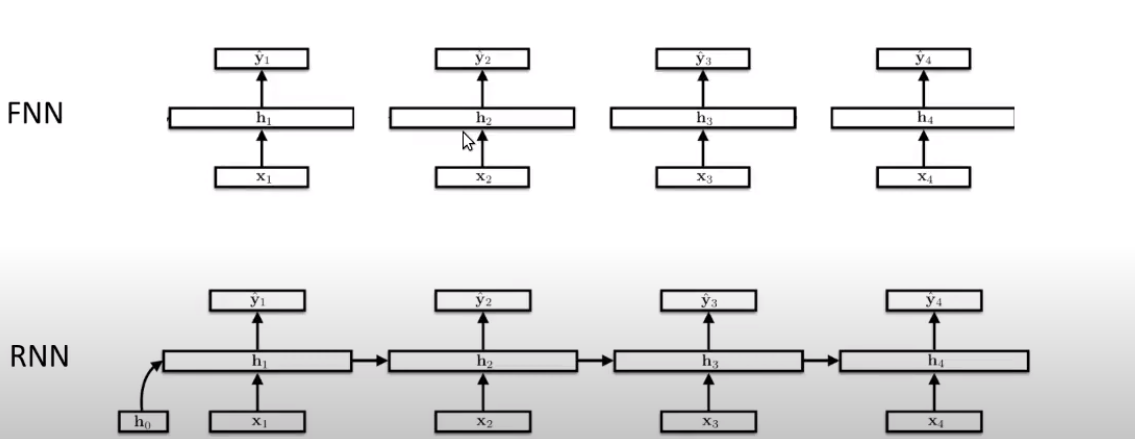

👉RNNs cho phép share các parameters, share weights trong từng layer của mạng

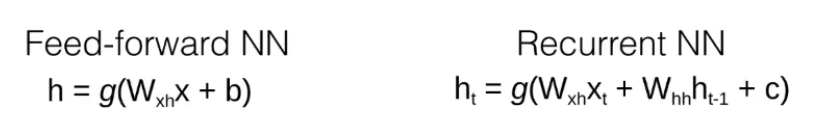

<div style="margin-left: 580px;"> Thành phần thể hiện memory 👆 

---

## Cách hoạt động trong 1 step:

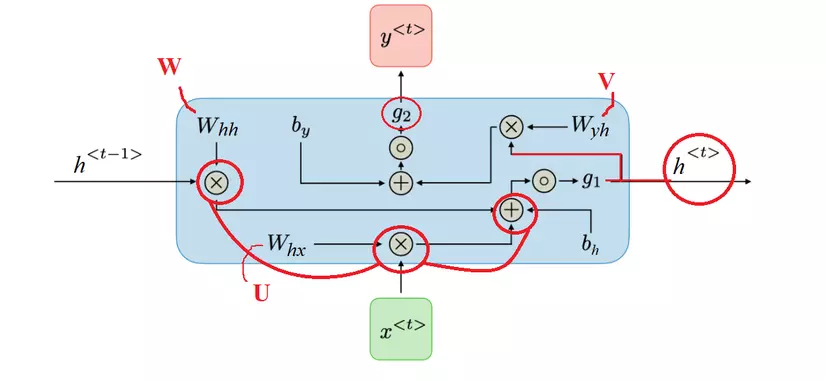

**Trong đó**:
* $x_t$ là đại diện cho **time step** thứ t
* $y_t$ là output của một step 

* $b_y,b_h$ là bias tương ứng của $y_t$ và $h_t$

* $g_1, g_2$ là hàm activation funtion (tanh hoặc ReLU)

* ⚠️$h_t$ là hidden state, là tổng hợp **thông tin của hidden state trước $h_{t-1}$**, và chính là **bộ nhớ của mạng**

<font size=5> $h_t = g_1(W_{hh}*h_{t-1} + W_{hx}*x_t + b_h)$
    

* **Output** $y_t$:

<font size=5> $y_t = g_2(W_{yh}*h_t + b_y)$ 

---

<FONT SIZE-4> Phân loại:
* **One to one**. VD: input là 1 ảnh, output là 1 ảnh được segment
* **One to many**. VD: input là 1 ảnh, output là 1 nhiều chữ mô tả ảnh đó, viết dưới dạng 1 câu.
* **Many to one**. VD: input là nhiều ảnh(frame) tách ra từ video, output là hành động trong video
* **Many to manny**. VD: input là 1 câu nhiều chữ:"I love VN", output cũng là 1 câu gồm nhiều chữ: "Tôi yêu VN"


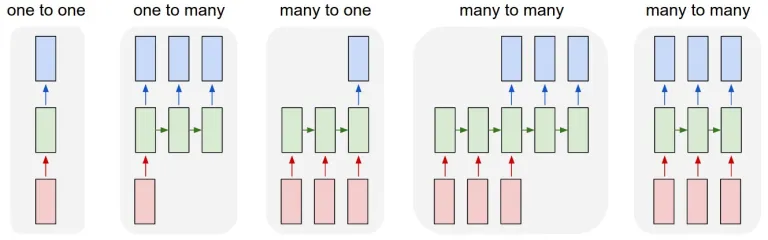

## Nhược điểm:

⚠️ Một số vấn đề:
* Phải thực hiện **tuần tự**, vì vậy, không thể tận dụng được khả năng tính toán song song của GPU/TPU
* Theo lý thuyết, RNN có thể mang thông tin từ trạng thái trước đến trạng thái sau
* Nhưng trên thực tế, RNN chỉ mang được thông tin qua <span style="color: red;"> 1 số bước</span> nhất định do vấn đề <span style="color: red;"> **vanishing gradient**</span>.

<font size =4> &#x1F4DA;VD:
    
<span style="color: green; font-size: 24px;">&#10004;</span> Mặt trời mọc ở hướng... -> Đông

<span style="color:red">&#10060;</span> Tôi đang du học tại Pháp. Tôi đã ở đây được hơn 10 năm rồi. Vì vậy, tôi có thể nói trôi chảy tiếng... -> Tịt

* Như vậy, RNN chỉ học được **thông tin ngắn hạn** `short-term memory` 👇

---

# Long Short-Term Memory (LSTM)

👉 Giống RNN: Thành phần short-term memory
    
👉 Khác RNN: Bổ sung thành phần long-term memory

⚠️ Bao gồm 3 thành phần:
* Quản lý việc thông tin đến từ **trạng thái trước** sẽ được giữ lại hoặc loại bỏ( nếu thông tin không liên quan) `Forget_gate`
* Quản lý việc học thông tin mới từ **đầu vào** `Input_gate`
* Quản lý việc đưa thông tin mới cập nhập vào trạng thái **kế tiếp** `Output_gate`

👉**RNN**

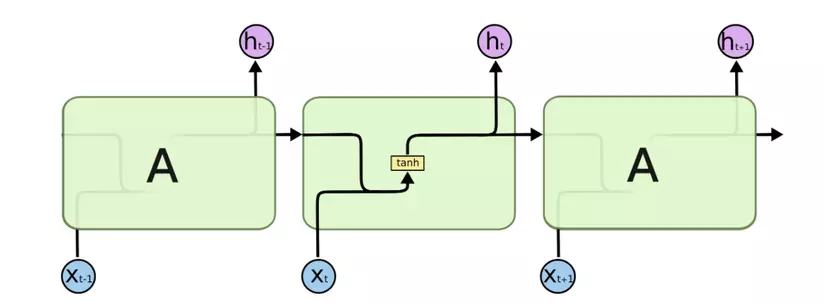

---

👉 **LSTM**

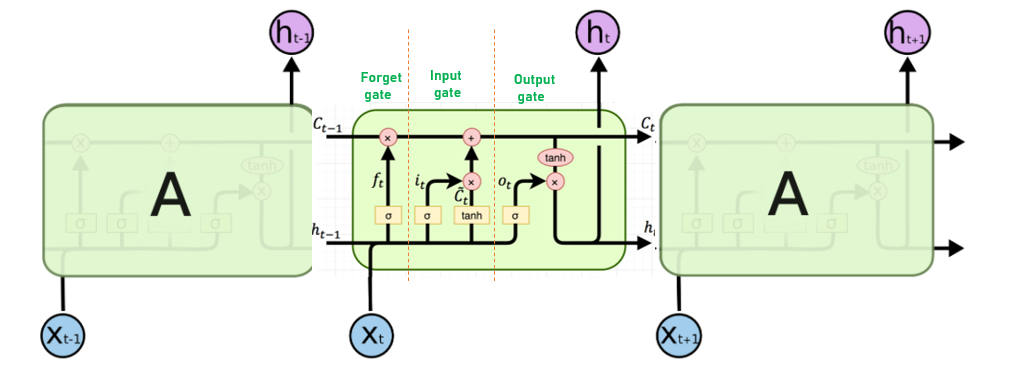

⚠️ Trong đó 2 output:
* $c_t$ là cell state
* $h_t$ là hidden state

3 input:
* $c_{t-1}$
* $h_{t-1}$
* $x_t$ 

* $f_t,i_t,o_t$ là **f**orget gate, **i**nput gate,**o**utput gate

Ta có:
* <span style="color: red;">$U_f,U_i,U_o$  </span> là các ma trận trọng số của input <span style="color: red;">$x_t$</span> tương ứng ở từng cổng f,i,o

* <span style="color: green;"> $W_f,W_i,W_o$</span> là các ma trận trọng số của <span style="color: green;"> $h_t$</span>   tương ứng ở từng cổng f,i,o

---

## Forget gate

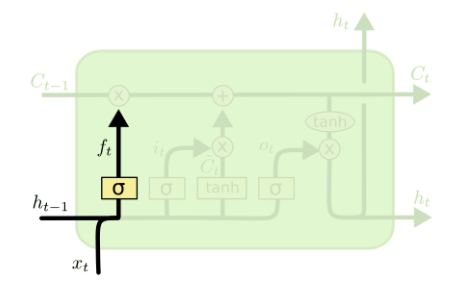

<font size=5> $ f_t = \sigma($<span style="color: red;"> $U_f$</span>$*$<span style="color: red;"> $x_t$</span> + <span style="color: green;"> $W_f$</span>$*$<span style="color: green;"> $h_{t-1}$</span> + $b_f$)

Thành phần **input** 👆<div style="margin-left: 250px;">  👆 Thành phần **short-memory**

Sau đó $f_t$ sẽ nhân với $c_{t-1}$ : $f_t \odot c_{t-1}$

<span style="color: green; font-size: 24px;">&#10004;</span> **forget gate** quyết định xem cần lấy bao nhiêu từ cell state

$f_t \in [0;1]$ : đại diện cho lượng thông tin $c_{t-1}$ sẽ giữ lại

👉 $f_t = 0$ : forget everything

👉 $f_t = 1$ : forget nothing

---

## Input gate

Quyết định xem những thông tin mới được đưa vào là nhiều hay ít

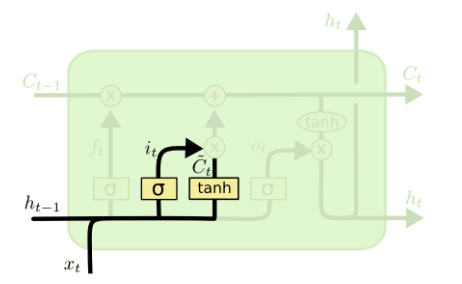


Chia thành 2 thành phần:

👉 $\tilde C$ đại diện cho các giá trị mới mà input ($x_t$) đem lại

<font size=5>🧮: 
    $\tilde C_t = tanh(W_c.[h_{t-1},x_t]+b_c)$

👉 $i_t$ đại diện cho lượng thông tin mới, **mức độ quan trọng** của thông tin mới so với thông tin cũ. Quyết định xem phần nào của $\tilde C$ sẽ được thêm vào $C$

<font size=5>🧮: $i_t = \sigma(W_i.[h_{t-1},x_t]+b_i)$

👉 Thành phần **long-term** của input vừa nhận vào:

<font size=5>🧮: $\tilde C \odot i_t$
    
 * Trong đó $\odot $ là phép nhân từng phần tử

👉 Thành phần **long-term** của cả cell, bao gồm thông tin cũ và thông tin của input:

<font size=5>🧮:  $C_t = C_{t-1} \odot f_t $ + $\tilde C \odot i_t$


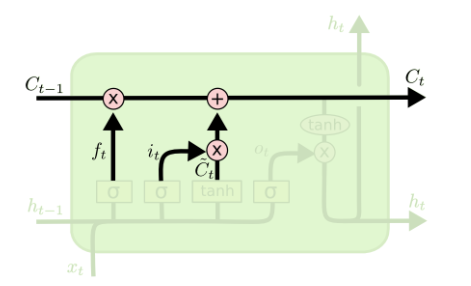

---

## Output gate

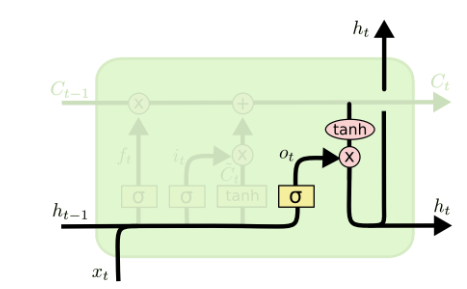

👉 Thành phần $o_t$ đại diện cho thông tin của input nhập vào:

<font size=5> 🧮: $o_t = \sigma(W_o [h_{t-1},x_t] +b_o) $

👉 Thành phần $C_t$ đại diện cho thông tin mới + thông tin cũ vừa được giữ lại ở trên

<font size=5>🧮:  $h_t = o_t \odot tanh(C_t) $ 

<span style="color: green; font-size: 24px;">&#10004;</span> Một phần của $h_t$ sẽ được lấy ra để tính **ouput**, một phần sẽ được đưa tiếp vào thành phần **short-term** cho cell sau

 ---

# Biến thể của LSTM

 ## Peephole connection

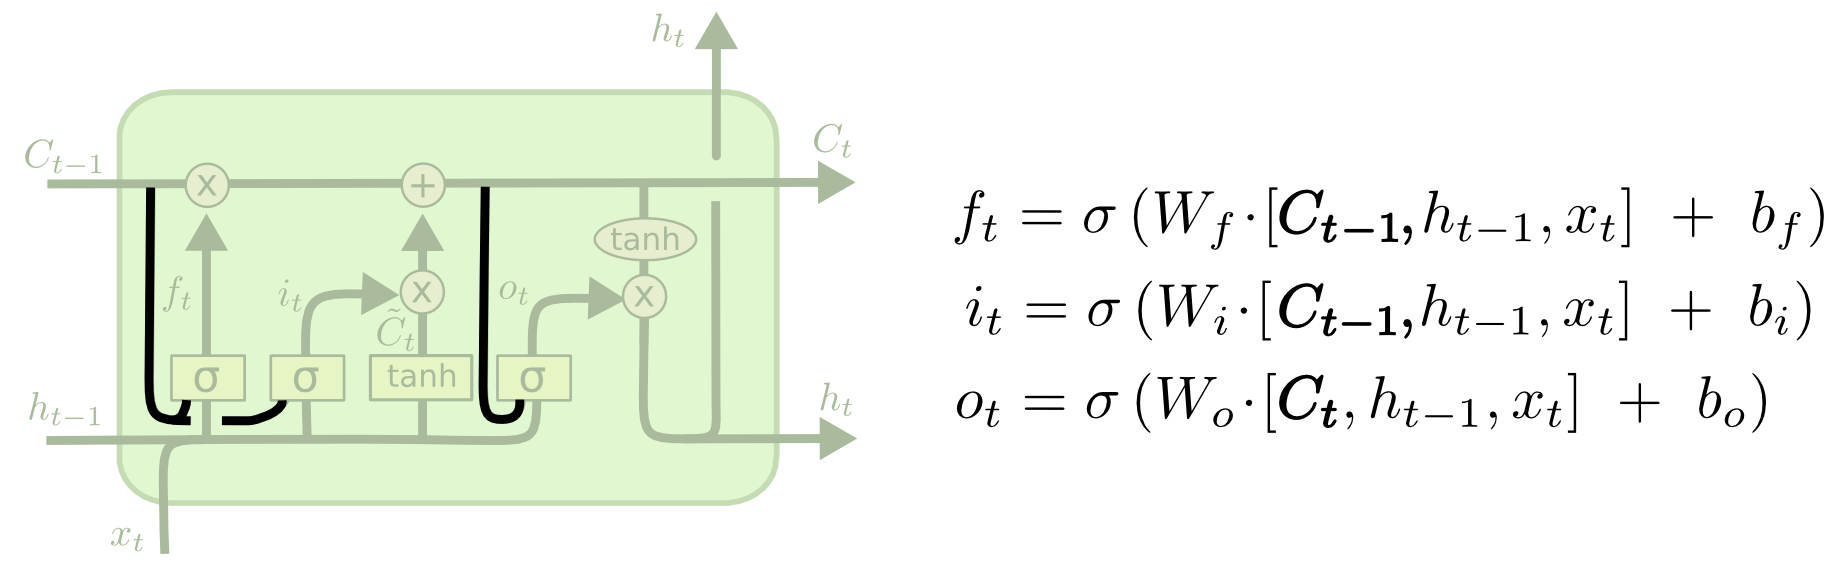

 <span style="color: green; font-size: 24px;">&#10004;</span>Tương tự như LSTM nhưng bổ sung thêm cổng PeePHole cho phép thông tin từ bộ nhớ dài hạn trước đó vào trực tiếp 3 cổng

<span style="color: green; font-size: 24px;">&#10004;</span> Hiệu suất có thể được cải thiện hơn so với LSTM

 ---

 ## GRU

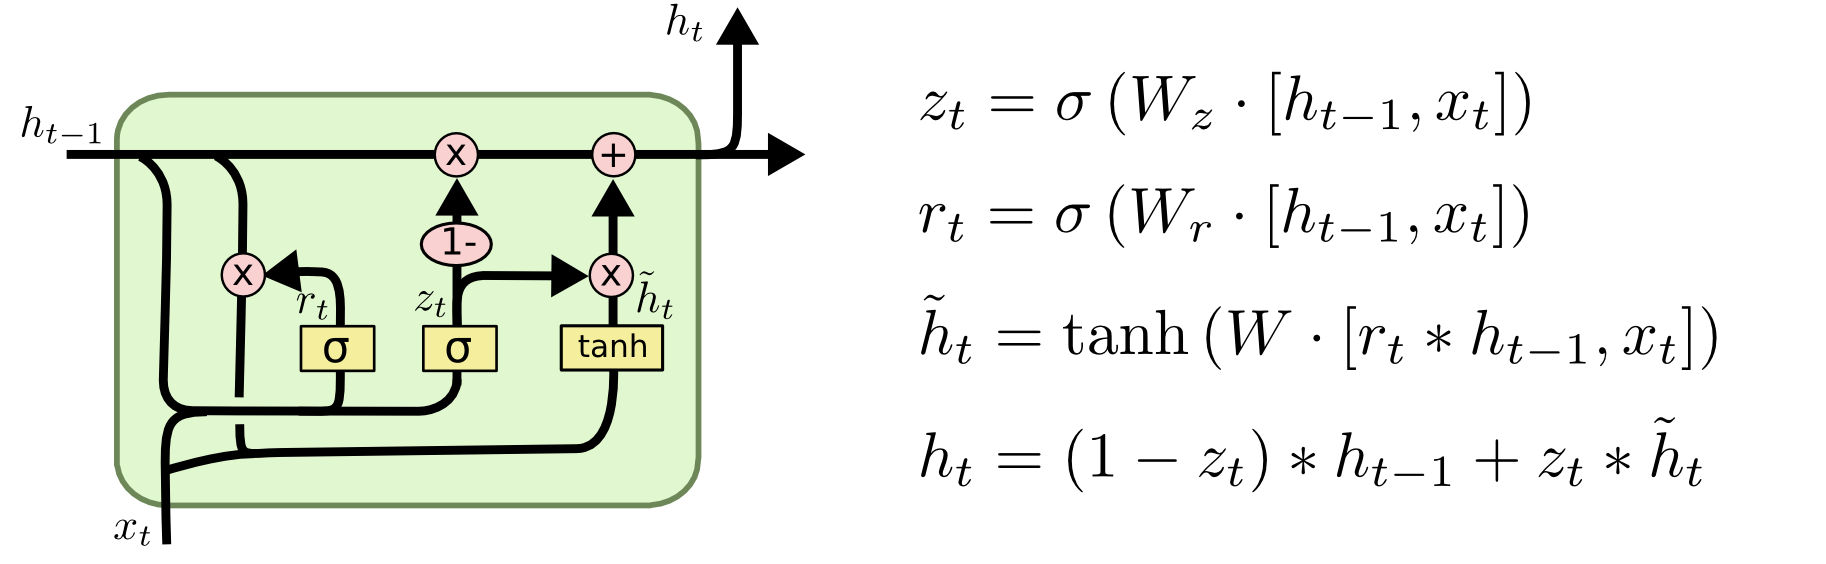

<span style="color: green; font-size: 24px;">&#10004;</span> Tương tự như LSTM, nhưng giải quyết được vấn đề phức tạp, ít cồng điểu khiển hơn, tăng hiệu suất tính toán, ít tham số,

Bao gồm 2 cổng chính:

👉 Update Gate (cổng cập nhật) giống như forget và input gate trong LSTM, nó quyết định lượng thông tin nên bỏ đi và nên giữ lại

👉 Reset Gate (cổng khôi phục) quyết định xem lượng thông tin quên đi là bao nhiêu

 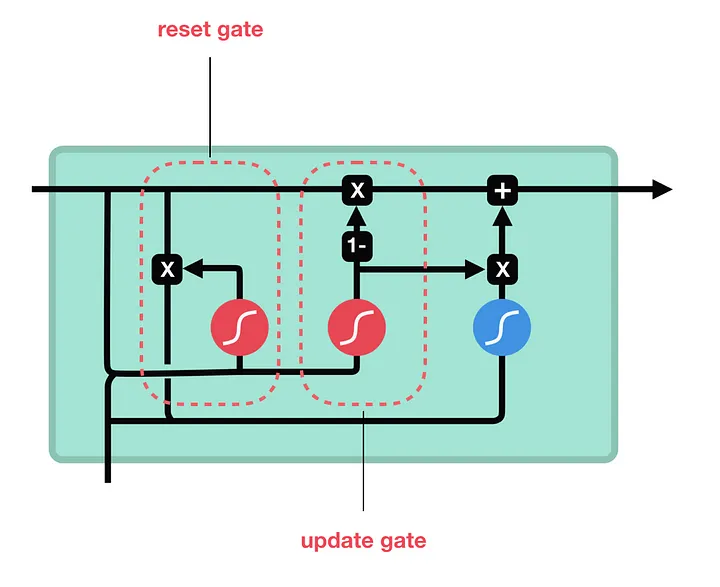

---

# Emoji


<span style="color:red">&#10060;</span> : X

👉 👇 👆


⚠️

<span style="color: green; font-size: 24px;">&#10004;</span>
: Dấu tích

&#128161; : bóng đèn

<font size =5> &#x1F9EE; Công thức 

<font size =5> &#x1F4DA; : Bài tập
   
<img src='link' style="width:500px;"/> : Chèn ảnh
    
<div style="margin-left: 200px;">: căn lề
    
<span style="color: red;"> Chữ_màu</span>